#**Evaluating & Improving ML models**

Case Study: Titanic Survival

**Objective:** The objective of this notebook is to walk you through several concepts that we discussed through the course for evaluating and improving ML models. You will be building and evaluating several models that will predict if a person survived or not during the Titanic incidence.

The titanic.csv file contains data for 891 of the original Titanic passengers. Each row represents one person. The columns describe different attributes about the person including:
* whether they survived (S),
* their age (A),
* their passenger-class (C),
* their gender (G),
* the fare they paid (X).

#Section 1: Data Preparation

## Importing Needed Libraries:

* numpy: for scientific computing
* matplot: for plotting and visualization
* pandas: for data reading and manipulation





In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.metrics import accuracy_score

## Importing the Data


In [ ]:

# Load the Titanic dataset into a DataFrame
data = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

data.head()

#Gets the specific data we need for our prediction
df = pd.DataFrame(data, columns= ['Survived', 'Pclass', 'Name', 'Age', 'Sex', 'Fare'])
df.replace(('male', 'female'), (0, 1), inplace=True) #Male is 0, Female is 1
df.head() #Prints the first 5 rows of the data

,Survived,Pclass,Name,Age,Sex,Fare
0,0,3,"Braund, Mr. Owen Harris",22.0,0,7.2500
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,71.2833
2,1,3,"Heikkinen, Miss. Laina",26.0,1,7.9250
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,53.1000
4,0,3,"Allen, Mr. William Henry",35.0,0,8.0500


Know the shape of the data

In [ ]:
df.shape

(891, 6)

## Data PreProcessing:


Check for null values

In [ ]:
print(df.isnull().sum())

Survived      0
Pclass        0
Name          0
Age         177
Sex           0
Fare          0
dtype: int64


Filling the null values

In [ ]:
df['Age'].fillna(value = df['Age'].mean(), inplace=True)

In [ ]:
print(df.isnull().sum()) #make sure all nulls are removed

Survived    0
Pclass      0
Name        0
Age         0
Sex         0
Fare        0
dtype: int64


Data preprocessing involves dividing the data into attributes and labels.

In [ ]:
x = df.drop(['Survived', 'Name'], axis = 1) #all the columns except the Name of the person and the target columns are being removed from the features data
y = df['Survived']

#Section 2: Fitting & Improving ML Models

Now we will explore some techniques that will help us to improve the performance of our ML models.

##Checking for Imbalanced Data

<Axes: >

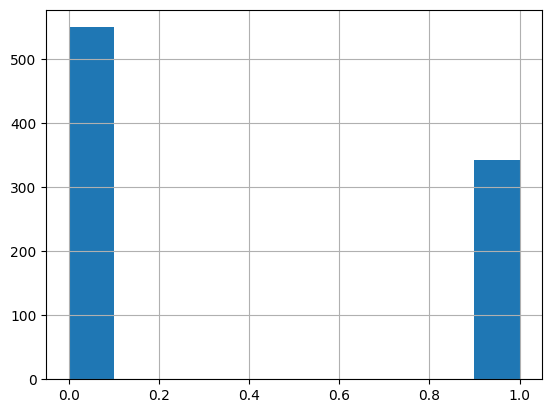

In [ ]:
df['Survived'].hist()

Let's say we want to fit on this imbalanced dataset a Logistic Regression model.

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
scores = cross_validate(model, x, y, cv=3, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_1 = scores.get('test_accuracy').mean()
precision_1 = scores.get('test_precision').mean()
recall_1 = scores.get('test_recall').mean()
f1_1 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_1,
      "\nPrecision:",precision_1,
      "\nRecall:", recall_1,
      "\nF1 Score:", f1_1)

Accuracy: 0.7867564534231201 
Precision: 0.7345930585804957 
Recall: 0.7017543859649124 
F1 Score: 0.7723014381369065


Let's try to oversample our minority class (Survived) and train the model again:

In [ ]:
from imblearn.over_sampling import RandomOverSampler

over = RandomOverSampler(sampling_strategy= 1) #sampling_strategy= 1 means I want both classes to have equal number of samples
x_new, y_new = over.fit_resample(x, y)

Check the performance of our model after we have a balanced dataset:

In [ ]:
from sklearn.model_selection import cross_validate

model = LogisticRegression()
scores = cross_validate(model, x_new, y_new, cv=3, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_2 = scores.get('test_accuracy').mean()
precision_2 = scores.get('test_precision').mean()
recall_2 = scores.get('test_recall').mean()
f1_2 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_2,
      "\nPrecision:",precision_2,
      "\nRecall:", recall_2,
      "\nF1 Score:", f1_2)

Accuracy: 0.7887067395264116 
Precision: 0.7827453947019164 
Recall: 0.7996357012750455 
F1 Score: 0.7886311922066825


We can see the improved effect of balancing the data on the precision, recall, and f1-score terms!!

##Random Forest Classifier

Let's try to improve our model a bit by using an ensemble method - the Decision/Random Forest.

A Decision Forest (or Random Forest) is an ensemble method relying on the aggregate predictions of several trees instead of one tree only. It belongs to the class of bagging ensemble methods.  

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators= 100) #100 trees participating in the aggregate prediction
scores = cross_validate(model, x_new, y_new, cv=3, scoring=['accuracy','precision', 'recall', 'f1_macro'])

accuracy_3 = scores.get('test_accuracy').mean()
precision_3 = scores.get('test_precision').mean()
recall_3 = scores.get('test_recall').mean()
f1_3 = scores.get('test_f1_macro').mean()

print("Accuracy:", accuracy_3,
      "\nPrecision:",precision_3,
      "\nRecall:", recall_3,
      "\nF1 Score:", f1_3)

Accuracy: 0.8715846994535519 
Precision: 0.8466378534701516 
Recall: 0.907103825136612 
F1 Score: 0.8713940981253284


After applying Random Forests to our balanced dataset, we can see an improvement in performance in both the precision and F1 scores!

Of course, there are many more improvements we can explore. It might also be useful to run more in depth EDA so we can choose the best & most effective improvement techniques for our problem and dataset.